### Imports et chargement des données

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Charger les trois fichiers
stars_df = pd.read_csv("Dataset/user_repo_stars_filtered_min_10.csv")  # user, repository
repos_df = pd.read_csv("Dataset/github-dataset.csv")  # repositories metadata
users_df = pd.read_csv("Dataset/users_stars.csv")     # user metadata

print(f"Taille initiale : {len(stars_df)} interactions, {len(repos_df)} repos, {len(users_df)} users.")

Taille initiale : 13407 interactions, 1009 repos, 22240 users.


### Affichage des données

In [51]:
print("Repositories : ")
repos_df

Repositories : 


,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,NaN
1,EddieHubCommunity/support,271,150,536,6,71,NaN
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,shobhit97/open-gpstracker,0,0,172,0,3,Java
...,...,...,...,...,...,...,...
1004,Tyriar/canvas-astar.dart,2,1,1,0,0,Dart
1005,ankitkumar70777/github-slideshow,0,0,1,0,8,HTML
1006,aitikgupta/interactive_cpu_scheduler,0,5,1,1,7,Python
1007,gwmccubbin/voting_dapp,11,5,1,0,0,JavaScript


In [52]:
print("Utilisateurs : ")
users_df

Utilisateurs : 


,login,name,company,location,public_repos,followers,following,created_at,bio,twitter_username,blog,languages_used,total_stars,total_forks
0,schacon,Scott Chacon,@gitbutlerapp,"Berlin, Germany",223,14024,27,2008-01-27T17:19:28Z,NaN,chacon,http://scottchacon.com,"['AGS Script', 'Arduino', 'JavaScript', 'Pytho...",9522,4363
1,adelcambre,Andy Delcambre,@stripe,"Boulder, CO",100,185,5,2008-02-13T18:43:41Z,NaN,NaN,NaN,"['Starlark', 'Shell', 'C++', 'CoffeeScript', '...",99,40
2,usergenic,Brendan Baldwin,NaN,"Eagle, ID",48,82,27,2008-02-21T17:47:48Z,I make software for people.,NaN,http://usergenic.com,"['VimL', 'TypeScript', 'Shell', 'JavaScript', ...",49,10
3,fdb,Frederik De Bleser,@nodebox,Belgium,211,234,135,2008-04-25T13:02:12Z,"Teacher / researcher at Sint Lucas Antwerpen, ...",enigmeta,https://www.enigmeta.com,"['JavaScript', 'Python', 'Max', 'Jupyter Noteb...",518,96
4,darinel,NaN,NaN,NaN,82,12,18,2008-10-17T12:57:47Z,Web developer,NaN,NaN,"['C++', 'CoffeeScript', 'CSS', 'JavaScript', '...",24,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22235,cxml2,CXML2,NaN,NaN,101,222,794,2021-08-23T10:06:10Z,NaN,NaN,NaN,[],71,1
22236,Cher172,おじぎ,NaN,コホリント島,10,110,193,2022-02-14T03:27:55Z,おじぎ/Ojigi/🇯🇵/加工強🥕🥕🥕 TL見れてません🙏 創作 #ojigikun Tik...,ojigi_chandayo,https://www.linkedin.com/in/%E3%81%8A%E3%81%98...,[],24,0
22237,KrauseFx,Felix Krause,NaN,"Vienna, Austria",143,5538,16,2011-06-23T08:24:50Z,Founder of ContextSDK\r\n\r\nProfessional iOS ...,KrauseFx,https://krausefx.com,"['TypeScript', 'Objective-C', 'Java', 'Shell',...",12635,1505
22238,AnkitChouhanDws,NaN,NaN,NaN,7,11,2,2018-04-13T07:59:44Z,NaN,NaN,NaN,"['JavaScript', 'Python']",2,1


In [53]:
print("Interactions (Repositories/Utilisateurs) : ")
stars_df

Interactions (Repositories/Utilisateurs) : 


,user,repository
0,ff6347,octocat/Hello-World
1,gmittal,octocat/Hello-World
2,angusshire,octocat/Hello-World
3,Jinxiansen,octocat/Hello-World
4,canering,octocat/Hello-World
...,...,...
13402,Chan9390,defuse/email-spoofing
13403,picatz,defuse/email-spoofing
13404,ur5us,defuse/email-spoofing
13405,MilleniumSpark,marcel-dempers/k8s-build-your-own


### Préparation des données

In [54]:
# Supprimer les doublons

stars_df["user"] = stars_df["user"].astype(str).str.strip()
stars_df["repository"] = stars_df["repository"].astype(str).str.strip()
stars_df.drop_duplicates(subset=["user", "repository"], inplace=True)

# Make sure repositories match between files 
merged_repos = repos_df[["repositories", "stars_count", "forks_count", "language"]].copy() 
merged_repos.rename(columns={"repositories": "repository"}, inplace=True)
merged_repos.drop_duplicates(subset=["repository"], keep="first", inplace=True)

# Keep only repositories that appear in both datasets 
stars_df = stars_df[stars_df["repository"].isin(merged_repos["repository"])] 

print(f"Taille finale : {len(stars_df)} interactions, {len(merged_repos)} repos, {len(users_df)} users.")

Taille finale : 13407 interactions, 932 repos, 22240 users.


### Division TRAIN/TEST (70 / 30)

In [55]:
# TRAIN/TEST split : 70/30 par utilisateur

train_list, test_list = [], []

for user, user_df in stars_df.groupby("user"):
    if len(user_df) < 2:
        train_list.append(user_df)
        continue
    
    train, test = train_test_split(
        user_df,
        test_size=0.3,
        random_state=42
    )
    train_list.append(train)
    test_list.append(test)

train_df = pd.concat(train_list)
test_df = pd.concat(test_list)

print(f"Train: {len(train_df)} interactions, Test: {len(test_df)} interactions")

Train: 9040 interactions, Test: 4367 interactions


### Model basé sur la popularité

In [56]:
popular_repos = merged_repos.sort_values(by="stars_count", ascending=False).reset_index(drop=True)
print(popular_repos)

                                  repository  stars_count  forks_count  \
0         iamshaunjp/Complete-React-Tutorial          995            0   
1          adrianhajdin/project_graphql_blog          977          233   
2    adrianhajdin/project_medical_pager_chat          968          336   
3                brettkromkamp/contextualise          960           43   
4                sukritishah15/DS-Algo-Point          956          289   
..                                       ...          ...          ...   
927         donnemartin/system-design-primer            0            0   
928                shobhit97/open-gpstracker            0            0   
929                    localstack/localstack            0            0   
930                           ethereum/aleth            0            0   
931         ankitkumar70777/github-slideshow            0            0   

       language  
0           NaN  
1    JavaScript  
2    JavaScript  
3        Python  
4          Java  
.. 

### Fonction de recommandation 

In [57]:
def recommend_popular(user_id, top_k=10):
    """Return top-k popular repositories that the user hasn't starred yet."""
    # dépôts déjà étoilés par l'utilisateur
    user_starred = set(train_df.loc[train_df["user"] == user_id, "repository"])
    # filtrer les dépôts non encore étoilés
    recs = popular_repos[~popular_repos["repository"].isin(user_starred)]
    # top_k
    return recs.head(top_k)["repository"].tolist()

### Evaluation

In [58]:
# calcul de la précision, recall et f-measure pour le test set
def precision_recall_f1_at_k(train_df, test_df, top_k=10):
    precisions, recalls, f1s = [], [], []

    users = test_df["user"].unique()
    for user in users:
        # test items (ground truth)
        true_items = set(test_df.loc[test_df["user"] == user, "repository"])
        if len(true_items) == 0:
            continue
        
        # recommended items
        recommended = set(recommend_popular(user, top_k=top_k))
        if not recommended:
            continue
        
        # true positives
        tp = len(true_items & recommended)
        precision = tp / len(recommended) if len(recommended) > 0 else 0
        recall = tp / len(true_items) if len(true_items) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)

    results = {
        "Precision@K": np.mean(precisions),
        "Recall@K": np.mean(recalls),
        "F1@K": np.mean(f1s)
    }
    return results


metrics = precision_recall_f1_at_k(train_df, test_df, top_k=10)

print("\nEvaluation Results (Popularity Model)")
print(f"Precision@10: {metrics['Precision@K']:.4f}")
print(f"Recall@10:    {metrics['Recall@K']:.4f}")
print(f"F1@10:        {metrics['F1@K']:.4f}")


Evaluation Results (Popularity Model)
Precision@10: 0.0181
Recall@10:    0.0352
F1@10:        0.0229


### Evaluation pour un user particulier

In [59]:
# Sélection d'un utilisateur particulier (par index or manuellement)
some_user = stars_df['user'].iloc[40]  # ou "Adlinke"
print(f"Evaluating user: {some_user}")

# USER PROFILE
user_profile = users_df[users_df["login"] == some_user]

if not user_profile.empty:
    print("\nUser profile:")
    print(user_profile.to_string(index=False))
else:
    print("No user metadata found")


Evaluating user: Adlinke

User profile:
  login                         name                             company location  public_repos  followers  following           created_at                                                                                                                                                                        bio twitter_username blog                                                                          languages_used  total_stars  total_forks
Adlinke Cap’n Donald Trump & AdLinke AdLinke Media & Trump Organisation       USA           867         18        467 2022-02-05T17:19:07Z Software Developer. Business Manager! \r\n• `#SovereignPurge`\r\n• `#NoDomesticSetup`\r\n• `#AdLinkeProtocol`\r\n• `#InfrastructureCorrection`\r\n• `#JurisdictionDeclared              NaN  NaN ['Forth', 'TypeScript', 'Java', 'Swift', 'Astro', 'JavaScript', 'Python', 'C#', 'HTML']           72           18


# Début TP

In [60]:

# Interaction du user
user_train = train_df[train_df["user"] == some_user]
user_test = test_df[test_df["user"] == some_user]

print(f"\nTrain interactions: {len(user_train)} repositories")
print(f"\nTest interactions:  {len(user_test)} repositories")

if len(user_train) > 0:
    print("\nTrain repositories:")
    print(user_train["repository"].to_list())

if len(user_test) > 0:
    print("\nTest repositories:")
    print(user_test["repository"].to_list())



Train interactions: 16 repositories

Test interactions:  7 repositories

Train repositories:
['PragneshRamani/Coursera---Using-Python-to-Access-Web-Data', 'kdeldycke/meta-package-manager', 'donnemartin/haxor-news', 'localstack/awscli-local', 'PragneshRamani/Coursera--Using-Databases-with-Python', 'adrianhajdin/ecommerce_sanity_stripe', 'ethereum/beacon-APIs', 'taniarascia/node-api-postgres', 'vicky002/charmander', 'RivaanRanawat/flutter-multiplayer-tictactoe', 'RivaanRanawat/cuadro', 'EddieHubCommunity/EddieBot', 'curiousily/Deep-Learning-For-Hackers', 'nikhilkumarsingh/content-downloader', 'iamrajiv/helloworld-grpc-gateway', 'vicky002/AlgoWiki']

Test repositories:
['taniarascia/primitive', 'google/acai', 'EddieHubCommunity/support', 'adrianhajdin/projects_realestate', 'feross/chrome-net', 'curiousily/Deploy-BERT-for-Sentiment-Analysis-with-FastAPI', 'sukritishah15/DS-Algo-Point']


In [61]:

# Liste des recommandations
recommendations = recommend_popular(some_user, top_k=10)
print("\nTop-10 Recommended repositories:")
for idx, repo in enumerate(recommendations, start=1):
    print(f"{idx}. {repo}")



Top-10 Recommended repositories:
1. iamshaunjp/Complete-React-Tutorial
2. adrianhajdin/project_graphql_blog
3. adrianhajdin/project_medical_pager_chat
4. brettkromkamp/contextualise
5. sukritishah15/DS-Algo-Point
6. EddieHubCommunity/awesome-github-profiles
7. torvalds/uemacs
8. taniarascia/primitive
9. antonmedv/countdown
10. adrianhajdin/chat_application


In [62]:

# EVALUATION
true_items = set(user_test["repository"])

if len(true_items) == 0:
    print("No test items found")
else:
    recommended = set(recommendations)
    tp = len(true_items & recommended)
    
    if tp > 0:
        print(f"\nCorrectly recommended repositories: {list(true_items & recommended)}")

    precision = tp / len(recommended) if len(recommended) > 0 else 0
    recall = tp / len(true_items) if len(true_items) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    print("\nUser-specific evaluation results:")
    print(f"Precision@10: {precision:.4f}")
    print(f"Recall@10:    {recall:.4f}")
    print(f"F1@10:        {f1:.4f}")


Correctly recommended repositories: ['sukritishah15/DS-Algo-Point', 'taniarascia/primitive']

User-specific evaluation results:
Precision@10: 0.2000
Recall@10:    0.2857
F1@10:        0.2353


Étape 1 — Modèle de popularité

Évaluation des métriques

In [63]:
import pandas as pd

def evaluate_model_comprehensive(test_df, recommend_function, k_values=[5, 10, 20]):

    results = []
    
    unique_users = test_df["user"].unique()
    print(f"Évaluation sur {len(unique_users)} utilisateurs...\n")
    
    for k in k_values:
        precisions, recalls, f1s = [], [], []
        users_with_hits = 0
        evaluated_users = 0
        
        for user in unique_users:
            ground_truth = set(test_df.loc[test_df["user"] == user, "repository"])
            if len(ground_truth) == 0:
                continue
            
            evaluated_users += 1
            
            recommended_items = set(recommend_function(user, top_k=k))
            assert recommended_items is not None, "La fonction de recommandation doit retourner une liste."
            
            true_positives = len(ground_truth & recommended_items)
            
            if true_positives > 0:
                users_with_hits += 1
            
            precision = true_positives / len(recommended_items) if len(recommended_items) > 0 else 0
            recall = true_positives / len(ground_truth) if len(ground_truth) > 0 else 0
            f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
            
            precisions.append(precision)
            recalls.append(recall)
            f1s.append(f1)
        
        hit_rate = users_with_hits / evaluated_users if evaluated_users > 0 else 0
        
        results.append({
            'K': k,
            'Precision@K': np.mean(precisions),
            'Recall@K': np.mean(recalls),
            'F1@K': np.mean(f1s),
            'Hit_Rate@K': hit_rate,
            'Utilisateurs évalués': evaluated_users
        })
    
    results_df = pd.DataFrame(results)
    return results_df


Étape 2 — Implémentation d’une autre approche

B. Filtrage collaboratif basé sur l’utilisateur

In [64]:
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from typing import List, Dict, Tuple
import pandas as pd

class UserMatrix:
    
    def __init__(self, train_df: pd.DataFrame, all_users: np.ndarray, all_items: np.ndarray) -> None:
        self.train_df = train_df
        self.all_users = all_users
        self.all_items = all_items
        
        self.user_item_matrix, self.user_to_idx, self.item_to_idx = self._build_user_item_matrix()
        self.user_similarities = self._compute_user_similarities()
        
        print(f"Matrice utilisateur-objet créée: {self.user_item_matrix.shape}")
        print(f"Matrice de similarités créée: {self.user_similarities.shape}")
    
    def _build_user_item_matrix(self) -> Tuple[csr_matrix, Dict[str, int], Dict[str, int]]:
        user_to_idx = {user: idx for idx, user in enumerate(self.all_users)}
        item_to_idx = {item: idx for idx, item in enumerate(self.all_items)}
        
        user_indices = [user_to_idx[user] for user in self.train_df['user']]
        item_indices = [item_to_idx[item] for item in self.train_df['repository']]
        
        values = np.ones(len(self.train_df))
        matrix = csr_matrix(
            (values, (user_indices, item_indices)), 
            shape=(len(self.all_users), len(self.all_items))
        )
        
        return matrix, user_to_idx, item_to_idx
    
    def _compute_user_similarities(self) -> np.ndarray:
        return cosine_similarity(self.user_item_matrix)
    
    def recommend_collaborative(self, user_id: str, n_neighbors: int = 10, top_k: int = 10) -> List[str]:
        user_idx = self.user_to_idx[user_id]
        
        user_sims = self.user_similarities[user_idx]
        neighbor_indices = np.argsort(user_sims)[-n_neighbors-1:-1]
        
        user_items = set(self.train_df[self.train_df['user'] == user_id]['repository'])
        
        item_scores = np.zeros(self.user_item_matrix.shape[1])
        for neighbor_idx in neighbor_indices:
            item_scores += user_sims[neighbor_idx] * self.user_item_matrix[neighbor_idx].toarray().flatten()
        
        idx_to_item = {idx: item for item, idx in self.item_to_idx.items()}
        
        ranked_items = [
            (idx_to_item[idx], score) 
            for idx, score in enumerate(item_scores)
            if idx_to_item[idx] not in user_items
        ]
        ranked_items.sort(key=lambda x: x[1], reverse=True)
        
        return [item for item, _ in ranked_items[:top_k]]


all_users = stars_df['user'].unique()
all_items = stars_df['repository'].unique()

user_matrix = UserMatrix(train_df, all_users, all_items)



Matrice utilisateur-objet créée: (901, 630)
Matrice de similarités créée: (901, 901)


In [65]:
import pandas as pd
from IPython.display import display

users = stars_df['user'].unique()

print("="*80)
print("RECOMMANDATIONS COLLABORATIVES - Échantillon d'utilisateurs".center(80))
print("="*80 + "\n")

for idx, some_user in enumerate(users[:5], 1):
    recommendations = user_matrix.recommend_collaborative(some_user, n_neighbors=10, top_k=10)
    
    print(f"\n{'─'*80}")
    print(f"UTILISATEUR {idx}: {some_user}")
    print(f"{'─'*80}\n")
    
    df_recs = pd.DataFrame({
        'Rang': range(1, len(recommendations) + 1),
        'Repository': recommendations
    })
    
    display(df_recs)

print(f"\n{'='*80}")
print("Fin des recommandations".center(80))
print(f"{'='*80}")


          RECOMMANDATIONS COLLABORATIVES - Échantillon d'utilisateurs           


────────────────────────────────────────────────────────────────────────────────
UTILISATEUR 1: ff6347
────────────────────────────────────────────────────────────────────────────────



,Rang,Repository
0,1,jgthms/css-reference
1,2,donnemartin/system-design-primer
2,3,florinpop17/app-ideas
3,4,arogozhnikov/python3_with_pleasure
4,5,trailofbits/algo
5,6,localstack/localstack
6,7,donnemartin/awesome-aws
7,8,vicky002/AlgoWiki
8,9,donnemartin/haxor-news
9,10,donnemartin/dev-setup



────────────────────────────────────────────────────────────────────────────────
UTILISATEUR 2: gmittal
────────────────────────────────────────────────────────────────────────────────



,Rang,Repository
0,1,kdeldycke/awesome-falsehood
1,2,jgthms/css-reference
2,3,xoreaxeaxeax/movfuscator
3,4,donnemartin/interactive-coding-challenges
4,5,EddieHubCommunity/LinkFree
5,6,donnemartin/system-design-primer
6,7,xoreaxeaxeax/sinkhole
7,8,localstack/localstack
8,9,WhiteHouse/api-standards
9,10,antonmedv/fx



────────────────────────────────────────────────────────────────────────────────
UTILISATEUR 3: angusshire
────────────────────────────────────────────────────────────────────────────────



,Rang,Repository
0,1,offensive-security/exploitdb
1,2,xoreaxeaxeax/rosenbridge
2,3,donnemartin/awesome-aws
3,4,donnemartin/haxor-news
4,5,feross/buffer
5,6,offensive-security/kali-linux-recipes
6,7,offensive-security/kali-arm-build-scripts
7,8,offensive-security/masscan-web-ui
8,9,trailofbits/cb-multios
9,10,trailofbits/algo



────────────────────────────────────────────────────────────────────────────────
UTILISATEUR 4: Jinxiansen
────────────────────────────────────────────────────────────────────────────────



,Rang,Repository
0,1,donnemartin/gitsome
1,2,jgthms/css-reference
2,3,jgthms/bulma
3,4,donnemartin/haxor-news
4,5,xoreaxeaxeax/sandsifter
5,6,florinpop17/app-ideas
6,7,donnemartin/dev-setup
7,8,donnemartin/interactive-coding-challenges
8,9,donnemartin/data-science-ipython-notebooks
9,10,xoreaxeaxeax/rosenbridge



────────────────────────────────────────────────────────────────────────────────
UTILISATEUR 5: canering
────────────────────────────────────────────────────────────────────────────────



,Rang,Repository
0,1,kdeldycke/awesome-falsehood
1,2,jgthms/bulma
2,3,jgthms/css-reference
3,4,offensive-security/kali-nethunter
4,5,donnemartin/saws
5,6,EddieHubCommunity/LinkFree
6,7,xoreaxeaxeax/sandsifter
7,8,localstack/localstack
8,9,donnemartin/interactive-coding-challenges
9,10,xoreaxeaxeax/movfuscator



                            Fin des recommandations                             


In [66]:
evaluation_results = evaluate_model_comprehensive( 
    test_df, 
    recommend_popular,
    k_values=[5, 10, 20, 50]
)


Évaluation sur 901 utilisateurs...



In [ ]:
def plot_evaluation_results(evaluation_results, model_name='MODÈLE'):

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'RÉSULTATS D\'ÉVALUATION - {model_name}', fontsize=16, fontweight='bold')

    metrics = ['Precision@K', 'Recall@K', 'F1@K', 'Hit_Rate@K']
    colors = ['#FF6B6B', '#4ECDC4', '#95E1D3', '#F38181']
    titles = ['Precision@K', 'Recall@K', 'F1-Score@K', 'Hit Rate@K']

    all_values = []
    for metric in metrics:
        all_values.extend(evaluation_results[metric].values)
    y_min_global = max(0, min(all_values) - 0.01)
    y_max_global = max(all_values) + 0.02

    for idx, (metric, title, color) in enumerate(zip(metrics, titles, colors)):
        row = idx // 2
        col = idx % 2
        ax = axes[row, col]
        
        k_values = evaluation_results['K'].values
        metric_values = evaluation_results[metric].values
        
        ax.plot(k_values, metric_values, marker='o', linewidth=2.5, 
                markersize=10, color=color, label=title)
        
        for k, value in zip(k_values, metric_values):
            ax.text(k, value, f'{value:.4f}', 
                    ha='center', va='bottom', fontsize=9, fontweight='bold')
        
        ax.set_xlabel('K (nombre de recommandations)', fontsize=11, fontweight='bold')
        ax.set_ylabel(title, fontsize=11, fontweight='bold')
        ax.set_title(f'{title} en fonction de K', fontsize=12, fontweight='bold')
        ax.grid(True, alpha=0.3, linestyle='--')
        ax.set_xticks(k_values)
        ax.legend(loc='best', fontsize=9)
        
        ax.set_ylim([y_min_global, y_max_global])

    plt.tight_layout()
    plt.show()

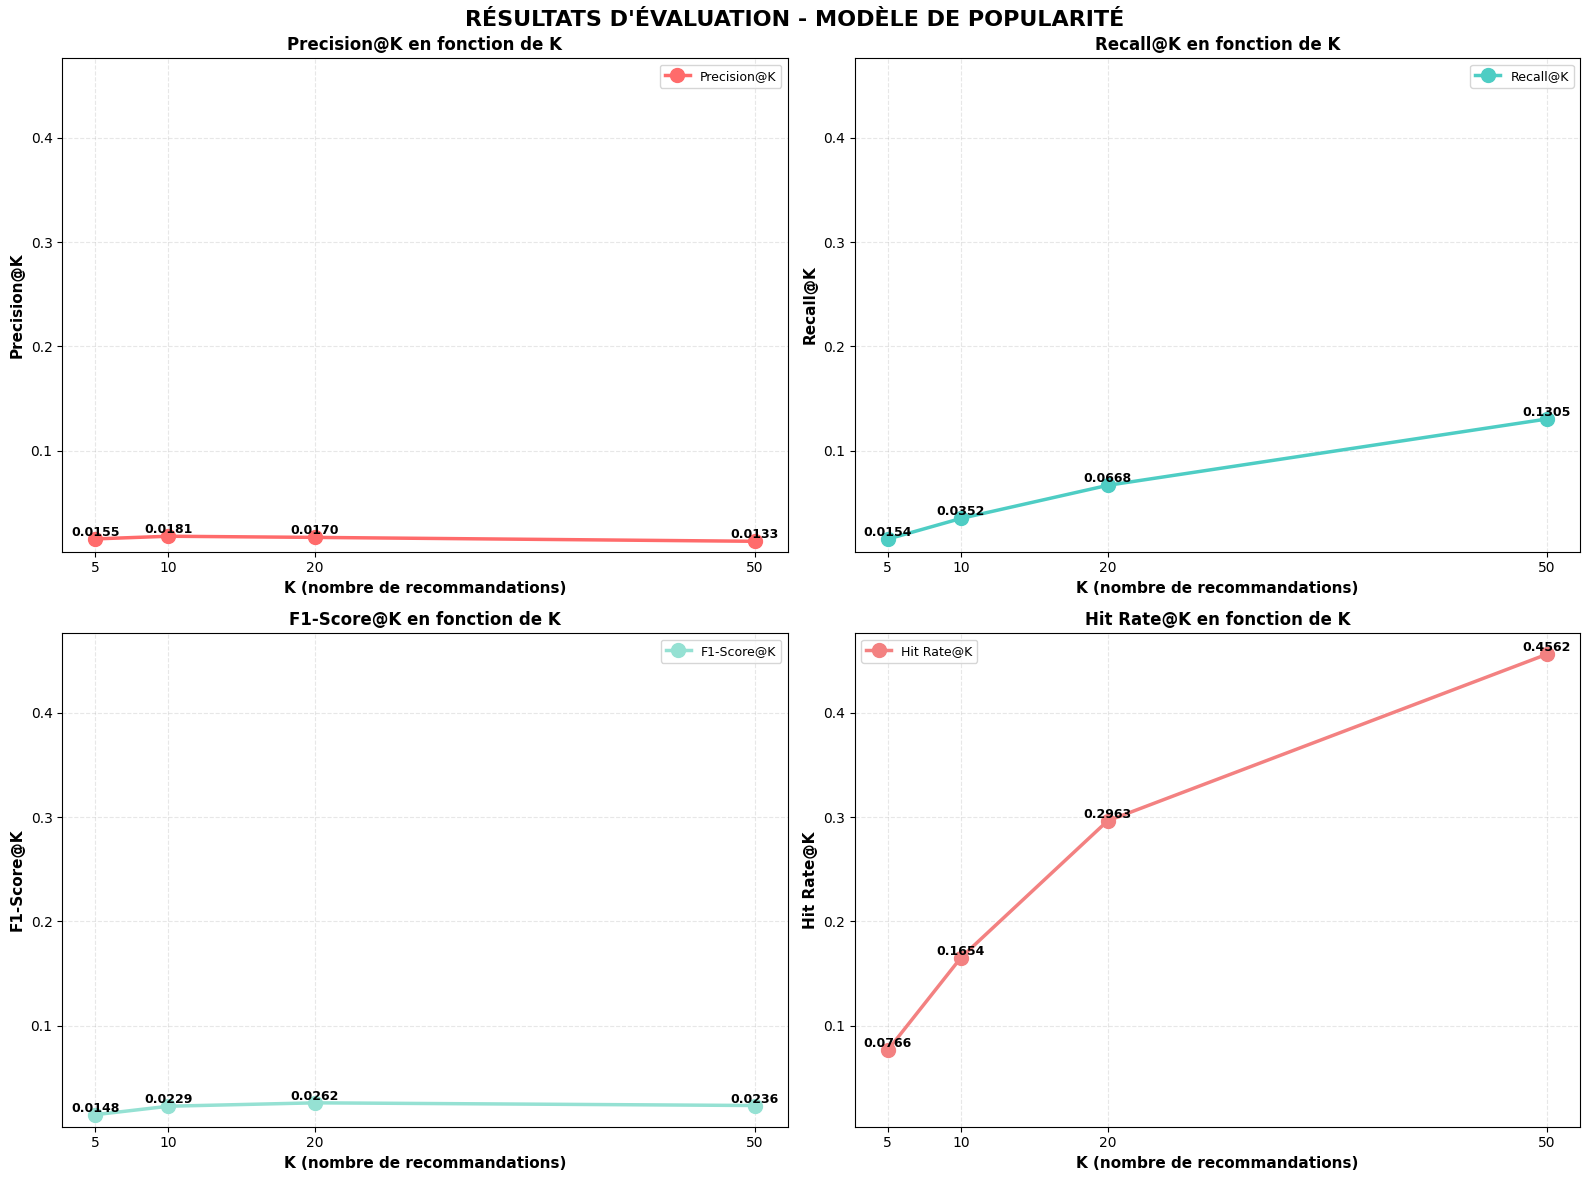

In [68]:
plot_evaluation_results(evaluation_results, model_name='MODÈLE DE POPULARITÉ')


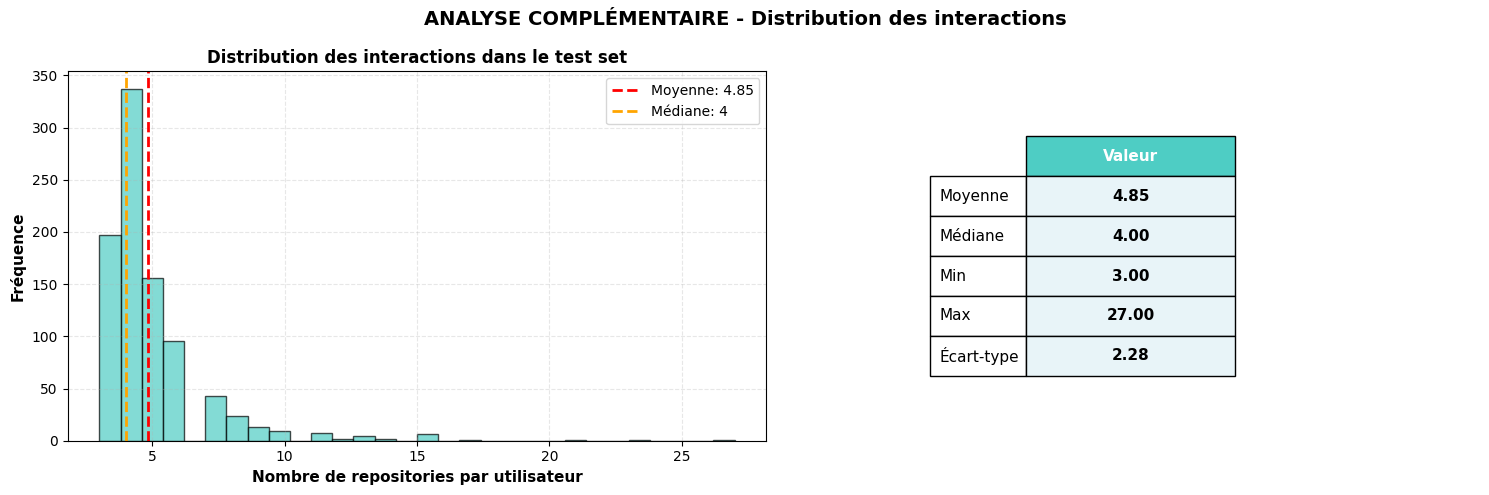

In [69]:
test_interactions_per_user = test_df.groupby("user").size()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('ANALYSE COMPLÉMENTAIRE - Distribution des interactions', fontsize=14, fontweight='bold')

axes[0].hist(test_interactions_per_user, bins=30, color='#4ECDC4', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Nombre de repositories par utilisateur', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Fréquence', fontsize=11, fontweight='bold')
axes[0].set_title('Distribution des interactions dans le test set', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].axvline(test_interactions_per_user.mean(), color='red', linestyle='--', linewidth=2, label=f'Moyenne: {test_interactions_per_user.mean():.2f}')
axes[0].axvline(test_interactions_per_user.median(), color='orange', linestyle='--', linewidth=2, label=f'Médiane: {test_interactions_per_user.median():.0f}')
axes[0].legend()

stats_data = {
    'Statistique': ['Moyenne', 'Médiane', 'Min', 'Max', 'Écart-type'],
    'Valeur': [
        test_interactions_per_user.mean(),
        test_interactions_per_user.median(),
        test_interactions_per_user.min(),
        test_interactions_per_user.max(),
        test_interactions_per_user.std()
    ]
}

axes[1].axis('off')
table = axes[1].table(cellText=[[f'{v:.2f}'] for v in stats_data['Valeur']],
                      rowLabels=stats_data['Statistique'],
                      colLabels=['Valeur'],
                      cellLoc='center',
                      loc='center',
                      colWidths=[0.3])
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2.5)

for i in range(len(stats_data['Statistique'])):
    table[(i+1, 0)].set_facecolor('#E8F4F8')
    table[(i+1, 0)].set_text_props(weight='bold')

table[(0, 0)].set_facecolor('#4ECDC4')
table[(0, 0)].set_text_props(weight='bold', color='white')

plt.tight_layout()
plt.show()


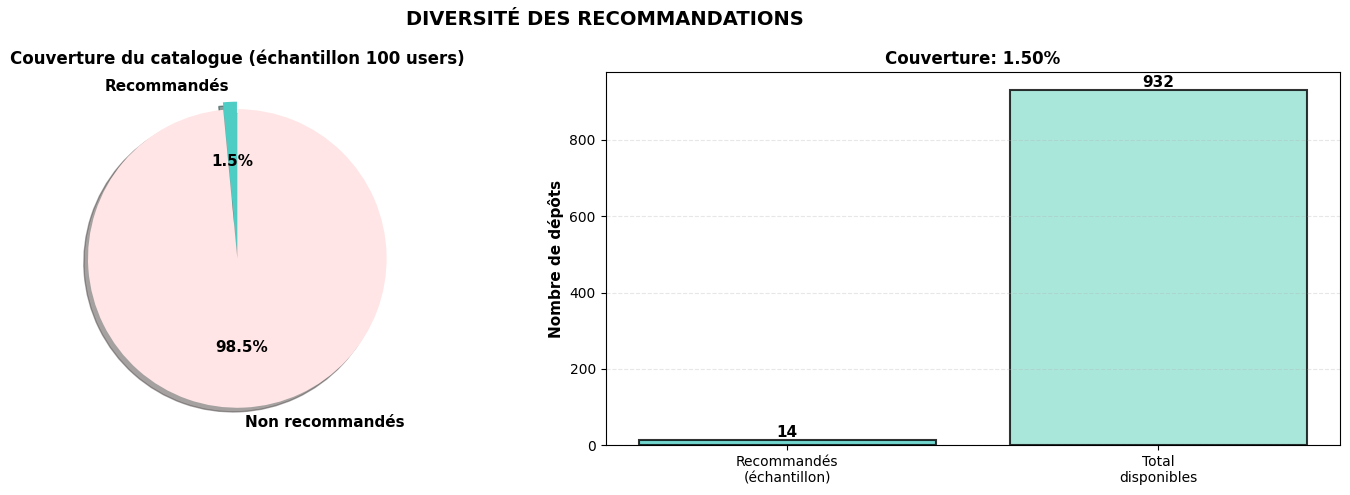

In [70]:
unique_recommended = set()
for user in test_df["user"].unique()[:100]:
    recs = recommend_popular(user, top_k=10)
    unique_recommended.update(recs)

coverage_rate = len(unique_recommended) / len(merged_repos) * 100
non_recommended = len(merged_repos) - len(unique_recommended)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('DIVERSITÉ DES RECOMMANDATIONS', fontsize=14, fontweight='bold')

sizes = [len(unique_recommended), non_recommended]
labels = ['Recommandés', 'Non recommandés']
colors = ['#4ECDC4', '#FFE5E5']
explode = (0.05, 0)

axes[0].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
            shadow=True, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[0].set_title('Couverture du catalogue (échantillon 100 users)', fontsize=12, fontweight='bold')

categories = ['Recommandés\n(échantillon)', 'Total\ndisponibles']
values = [len(unique_recommended), len(merged_repos)]
colors_bar = ['#4ECDC4', '#95E1D3']

bars = axes[1].bar(categories, values, color=colors_bar, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[1].set_ylabel('Nombre de dépôts', fontsize=11, fontweight='bold')
axes[1].set_title(f'Couverture: {coverage_rate:.2f}%', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3, linestyle='--')

for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


### Évaluation du modèle collaboratif

In [72]:
evaluation_results_collab = evaluate_model_comprehensive(
    test_df, 
    lambda user_id, top_k: user_matrix.recommend_collaborative(
        user_id, 
        n_neighbors=10,
        top_k=top_k
    ),
    k_values=[5, 10, 20, 50]
)

Évaluation sur 901 utilisateurs...



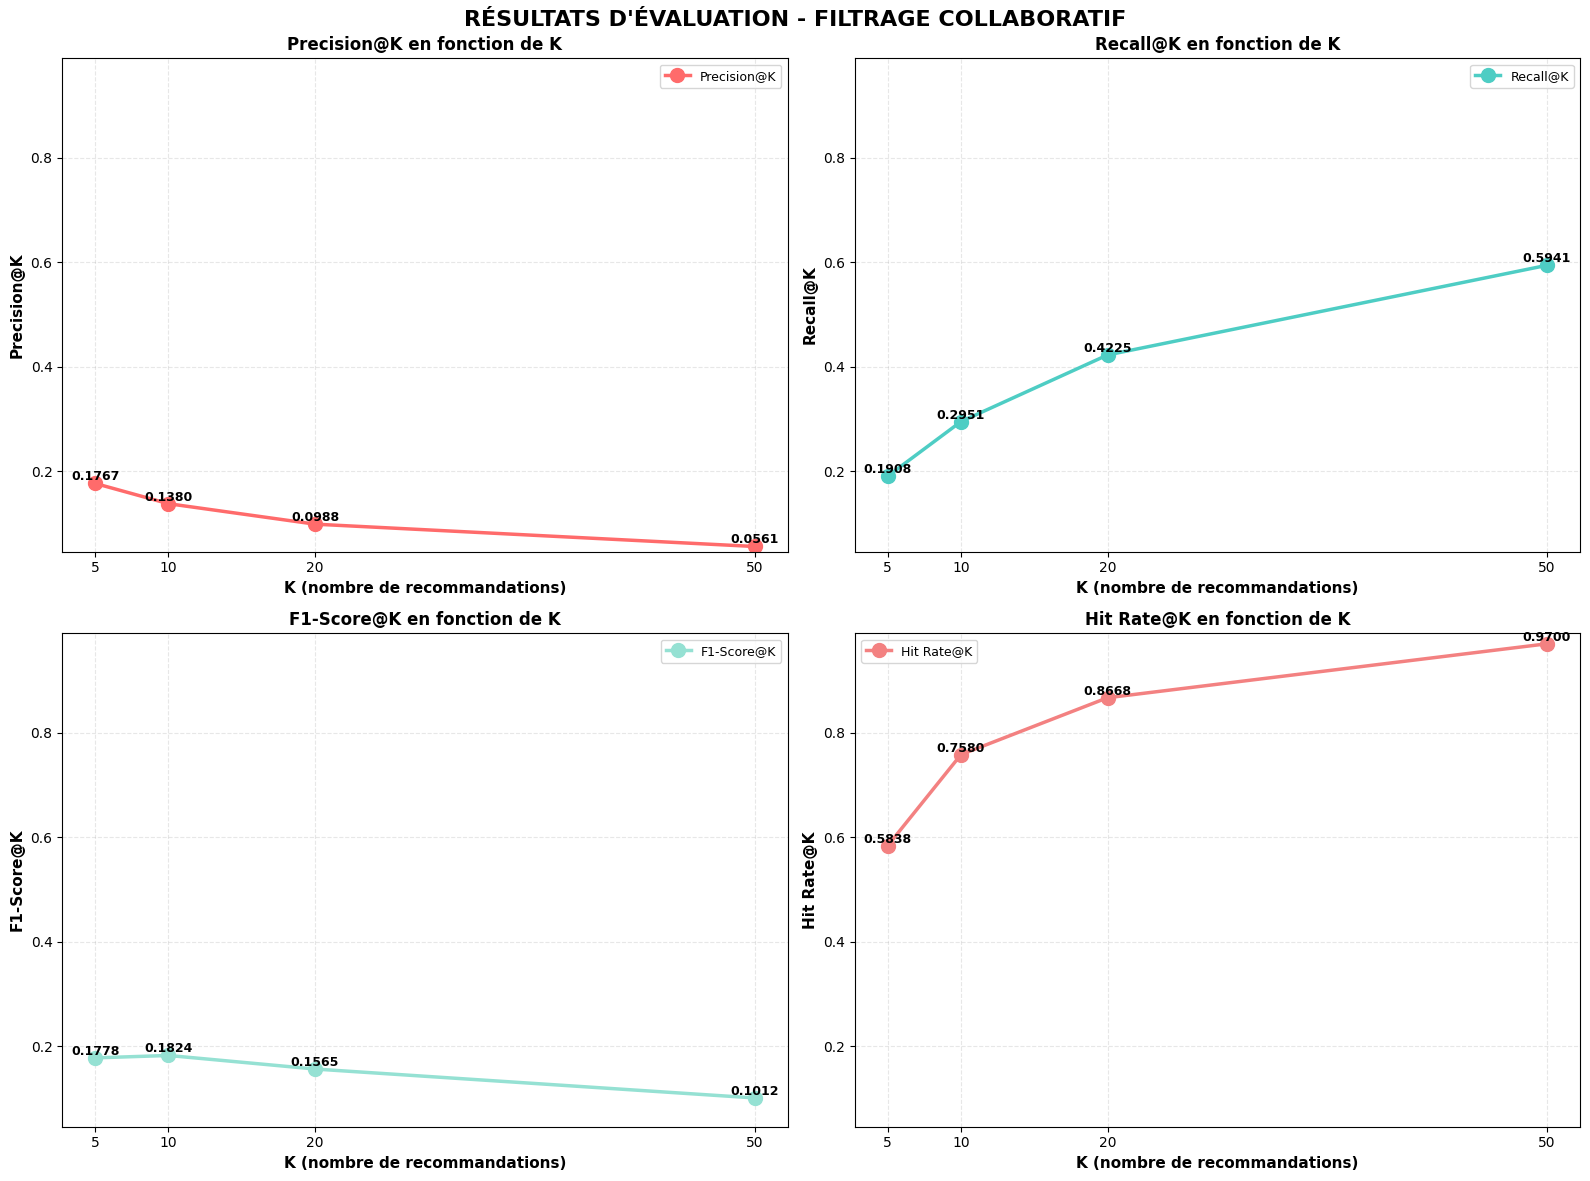

In [73]:
plot_evaluation_results(evaluation_results_collab, model_name='FILTRAGE COLLABORATIF')


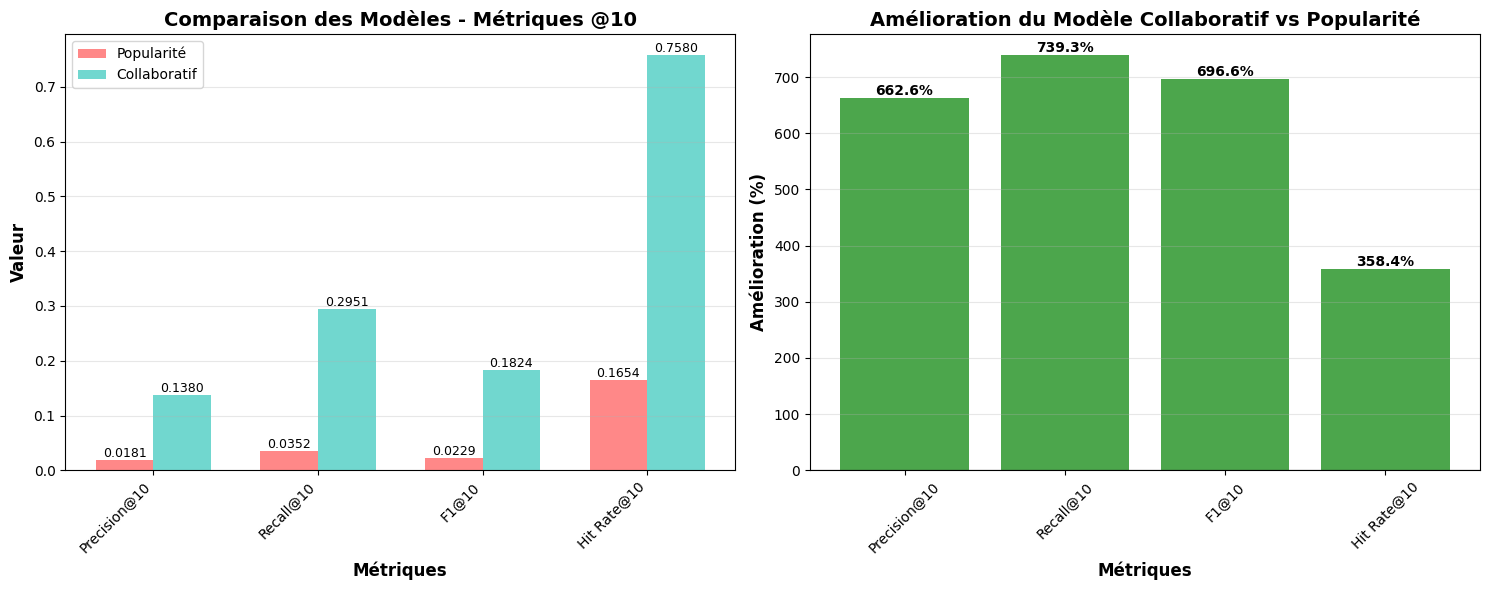

In [74]:
comparison = pd.DataFrame({
    'Métrique': ['Precision@10', 'Recall@10', 'F1@10', 'Hit Rate@10'],
    'Popularité': [
        evaluation_results[evaluation_results['K'] == 10]['Precision@K'].iloc[0],
        evaluation_results[evaluation_results['K'] == 10]['Recall@K'].iloc[0],
        evaluation_results[evaluation_results['K'] == 10]['F1@K'].iloc[0],
        evaluation_results[evaluation_results['K'] == 10]['Hit_Rate@K'].iloc[0]
    ],
    'Collaboratif': [
        evaluation_results_collab[evaluation_results_collab['K'] == 10]['Precision@K'].iloc[0],
        evaluation_results_collab[evaluation_results_collab['K'] == 10]['Recall@K'].iloc[0],
        evaluation_results_collab[evaluation_results_collab['K'] == 10]['F1@K'].iloc[0],
        evaluation_results_collab[evaluation_results_collab['K'] == 10]['Hit_Rate@K'].iloc[0]
    ]
})

comparison['Différence'] = comparison['Collaboratif'] - comparison['Popularité']
comparison['Amélioration'] = (comparison['Différence'] / comparison['Popularité'] * 100).round(2)

# Visualisation graphique
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Graphique 1: Comparaison des métriques
x = np.arange(len(comparison['Métrique']))
width = 0.35

bars1 = axes[0].bar(x - width/2, comparison['Popularité'], width, label='Popularité', color='#FF6B6B', alpha=0.8)
bars2 = axes[0].bar(x + width/2, comparison['Collaboratif'], width, label='Collaboratif', color='#4ECDC4', alpha=0.8)

axes[0].set_xlabel('Métriques', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Valeur', fontsize=12, fontweight='bold')
axes[0].set_title('Comparaison des Modèles - Métriques @10', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(comparison['Métrique'], rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Ajouter les valeurs sur les barres
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.4f}',
                    ha='center', va='bottom', fontsize=9)

# Graphique 2: Pourcentage d'amélioration
colors = ['green' if x > 0 else 'red' for x in comparison['Amélioration']]
bars3 = axes[1].bar(comparison['Métrique'], comparison['Amélioration'], color=colors, alpha=0.7)

axes[1].set_xlabel('Métriques', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Amélioration (%)', fontsize=12, fontweight='bold')
axes[1].set_title('Amélioration du Modèle Collaboratif vs Popularité', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
axes[1].grid(axis='y', alpha=0.3)

# Ajouter les valeurs sur les barres
for bar in bars3:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom' if height > 0 else 'top', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()
